In [ ]:
#!pip install langdetect

In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load your sentiment analysis dataset (replace with your data loading code)
# Your dataset should have two columns: 'text' (text samples) and 'label' (sentiment labels)
# Example:
# dataset = load_your_dataset()

dataset = pd.read_csv('/content/drive/MyDrive/H.IAAC/datasets/AMAZON_US.csv').drop(columns=['userName', 'userImage'])
dataset.head(5)

,Unnamed: 0,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0,7bf6a011-e66c-4842-b18b-18c726e9f5ee,Can't sign in. Will never call to access accou...,1,0,26.23.4.100,2024-01-09 01:08:56,NaN,NaN,26.23.4.100
1,1,49237f5d-7684-42e8-8a89-6ed766a10026,With every update something new is broken and ...,1,0,26.23.4.100,2024-01-09 01:07:44,NaN,NaN,26.23.4.100
2,2,29fb521d-f9f0-49f1-81f7-c4aafd9b8bf7,laggy can't do anything. bad search engine,1,0,26.23.4.100,2024-01-09 00:51:25,NaN,NaN,26.23.4.100
3,3,c9d0b449-d963-4f1a-bcf0-1dcf29148cc1,It's much easier to use on mobile phones,3,0,26.23.4.100,2024-01-09 00:20:27,NaN,NaN,26.23.4.100
4,4,030896c8-32dd-432c-b3c5-0dc046e2468b,I want to delete it now,1,0,26.19.4.100,2024-01-08 23:59:29,NaN,NaN,26.19.4.100


In [ ]:
dataset.shape

(25000, 10)

In [ ]:
dataset

,Unnamed: 0,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0,7bf6a011-e66c-4842-b18b-18c726e9f5ee,Can't sign in. Will never call to access accou...,1,0,26.23.4.100,2024-01-09 01:08:56,NaN,NaN,26.23.4.100
1,1,49237f5d-7684-42e8-8a89-6ed766a10026,With every update something new is broken and ...,1,0,26.23.4.100,2024-01-09 01:07:44,NaN,NaN,26.23.4.100
2,2,29fb521d-f9f0-49f1-81f7-c4aafd9b8bf7,laggy can't do anything. bad search engine,1,0,26.23.4.100,2024-01-09 00:51:25,NaN,NaN,26.23.4.100
3,3,c9d0b449-d963-4f1a-bcf0-1dcf29148cc1,It's much easier to use on mobile phones,3,0,26.23.4.100,2024-01-09 00:20:27,NaN,NaN,26.23.4.100
4,4,030896c8-32dd-432c-b3c5-0dc046e2468b,I want to delete it now,1,0,26.19.4.100,2024-01-08 23:59:29,NaN,NaN,26.19.4.100
...,...,...,...,...,...,...,...,...,...,...
24995,24995,53aba6d0-ac2d-4e36-b3f9-2734c0e0d0e0,Nice,3,0,24.9.0.100,2022-05-05 11:56:18,NaN,NaN,24.9.0.100
24996,24996,c0c38562-f271-42e9-9746-743813e63296,Shopping with Amazon is fine. I enjoy it and t...,3,614,24.8.0.100,2022-05-05 11:12:48,NaN,NaN,24.8.0.100
24997,24997,474b6f4e-c2d5-4587-ab46-6e48f5495024,"Basicly Good But...since a couple updates ago,...",3,84,24.8.0.100,2022-05-05 07:44:01,NaN,NaN,24.8.0.100
24998,24998,c5e99ba5-77a8-4d91-8975-9641d1d1d1b2,Fair,3,0,24.8.0.100,2022-05-05 07:00:53,NaN,NaN,24.8.0.100


In [ ]:
# Let's check for missing values
dataset.isnull().sum()

Unnamed: 0                  0
reviewId                    0
content                     3
score                       0
thumbsUpCount               0
reviewCreatedVersion     3247
at                          0
replyContent            24999
repliedAt               24999
appVersion               3247
dtype: int64

In [ ]:
dataset = dataset[dataset['content'].str.len() > 30].reset_index()

In [ ]:
dataset

,index,Unnamed: 0,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0,0,7bf6a011-e66c-4842-b18b-18c726e9f5ee,Can't sign in. Will never call to access accou...,1,0,26.23.4.100,2024-01-09 01:08:56,NaN,NaN,26.23.4.100
1,1,1,49237f5d-7684-42e8-8a89-6ed766a10026,With every update something new is broken and ...,1,0,26.23.4.100,2024-01-09 01:07:44,NaN,NaN,26.23.4.100
2,2,2,29fb521d-f9f0-49f1-81f7-c4aafd9b8bf7,laggy can't do anything. bad search engine,1,0,26.23.4.100,2024-01-09 00:51:25,NaN,NaN,26.23.4.100
3,3,3,c9d0b449-d963-4f1a-bcf0-1dcf29148cc1,It's much easier to use on mobile phones,3,0,26.23.4.100,2024-01-09 00:20:27,NaN,NaN,26.23.4.100
4,6,6,4b580717-2d07-4fa0-bdf9-195e11497673,Just give numbered code for lockers,1,1,26.23.4.100,2024-01-08 23:33:33,NaN,NaN,26.23.4.100
...,...,...,...,...,...,...,...,...,...,...,...
17491,24993,24993,de1c4ae1-7b34-4a73-af67-105f2f3b087b,Having a problem with email weblinks not openi...,3,0,24.8.0.100,2022-05-05 18:27:30,NaN,NaN,24.8.0.100
17492,24994,24994,6e8fe088-2777-412a-81ff-9019751a4f19,Not up to par. App constantly freezes and cras...,4,52,24.8.0.100,2022-05-05 18:23:13,NaN,NaN,24.8.0.100
17493,24996,24996,c0c38562-f271-42e9-9746-743813e63296,Shopping with Amazon is fine. I enjoy it and t...,3,614,24.8.0.100,2022-05-05 11:12:48,NaN,NaN,24.8.0.100
17494,24997,24997,474b6f4e-c2d5-4587-ab46-6e48f5495024,"Basicly Good But...since a couple updates ago,...",3,84,24.8.0.100,2022-05-05 07:44:01,NaN,NaN,24.8.0.100


In [ ]:
# Count the occurrences of each score
score_counts = dataset['score'].value_counts().sort_index()
print(score_counts)

1    3895
2    4413
3    3991
4    2970
5    2227
Name: score, dtype: int64


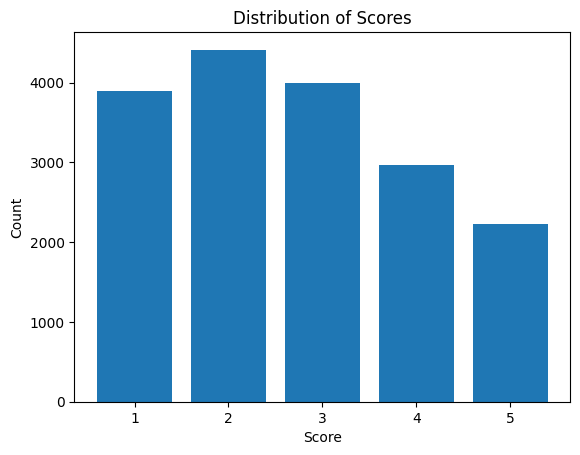

In [ ]:
# Create a bar plot
plt.bar(score_counts.index, score_counts.values)

# Set plot labels and title
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')

# Set the x-axis ticks to show only integers from 1 to 5
plt.xticks(range(1, 6))

# Show the plot
plt.show()

In [ ]:
# Define a custom function to map scores to sentiment
def map_score_to_sentiment(score):
    if score in [1, 2]:
        return 0
    elif score == 3:
        return 1
    elif score in [4, 5]:
        return 2
    else:
        return None  # Handle other cases if needed

# Apply the custom function to create a new 'sentiment' column
dataset['sentiment'] = dataset['score'].apply(map_score_to_sentiment)

In [ ]:
grade_counts = dataset['sentiment'].value_counts().sort_index()
print(grade_counts)

0    8308
1    3991
2    5197
Name: sentiment, dtype: int64


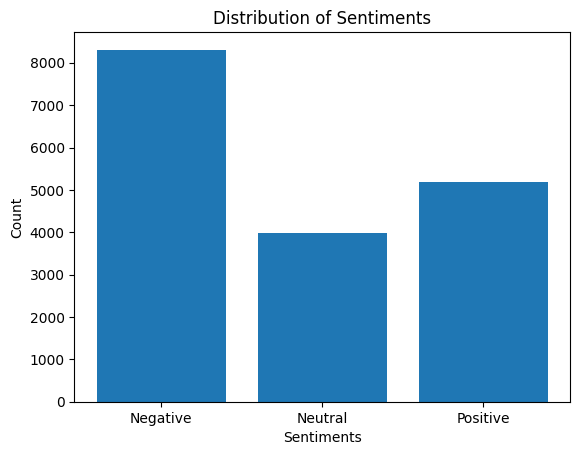

In [ ]:
# Create a bar plot
plt.bar(grade_counts.index, grade_counts.values)

class_names = ['Negative', 'Neutral', 'Positive']

# Set plot labels and title
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Set the x-axis ticks to show only integers from 1 to 5
plt.xticks(grade_counts.index, class_names)

# Show the plot
plt.show()

"[Why People Are More Likely To Leave a Negative Review](https://rizereviews.com/why-people-are-more-likely-to-leave-a-negative-review-than-a-positive-review/): This article from Rize Reviews delves into the psychological reasons why negative experiences resonate more strongly with us and are therefore more likely to be vocalized. It mentions the concept of "negativity bias," which suggests that our brains process negative information more thoroughly and retain it longer.

Another Reference: https://biz.source.colostate.edu/negative-online-reviews-impact-study/

In [ ]:
def lenCount(text):
  return len(text)

dataset['lengthContent'] = dataset['content'].apply(lenCount)

In [ ]:
dataset

,index,Unnamed: 0,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sentiment,lengthContent
0,0,0,7bf6a011-e66c-4842-b18b-18c726e9f5ee,Can't sign in. Will never call to access accou...,1,0,26.23.4.100,2024-01-09 01:08:56,NaN,NaN,26.23.4.100,0,65
1,1,1,49237f5d-7684-42e8-8a89-6ed766a10026,With every update something new is broken and ...,1,0,26.23.4.100,2024-01-09 01:07:44,NaN,NaN,26.23.4.100,0,406
2,2,2,29fb521d-f9f0-49f1-81f7-c4aafd9b8bf7,laggy can't do anything. bad search engine,1,0,26.23.4.100,2024-01-09 00:51:25,NaN,NaN,26.23.4.100,0,42
3,3,3,c9d0b449-d963-4f1a-bcf0-1dcf29148cc1,It's much easier to use on mobile phones,3,0,26.23.4.100,2024-01-09 00:20:27,NaN,NaN,26.23.4.100,1,40
4,6,6,4b580717-2d07-4fa0-bdf9-195e11497673,Just give numbered code for lockers,1,1,26.23.4.100,2024-01-08 23:33:33,NaN,NaN,26.23.4.100,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17491,24993,24993,de1c4ae1-7b34-4a73-af67-105f2f3b087b,Having a problem with email weblinks not openi...,3,0,24.8.0.100,2022-05-05 18:27:30,NaN,NaN,24.8.0.100,1,187
17492,24994,24994,6e8fe088-2777-412a-81ff-9019751a4f19,Not up to par. App constantly freezes and cras...,4,52,24.8.0.100,2022-05-05 18:23:13,NaN,NaN,24.8.0.100,2,481
17493,24996,24996,c0c38562-f271-42e9-9746-743813e63296,Shopping with Amazon is fine. I enjoy it and t...,3,614,24.8.0.100,2022-05-05 11:12:48,NaN,NaN,24.8.0.100,1,468
17494,24997,24997,474b6f4e-c2d5-4587-ab46-6e48f5495024,"Basicly Good But...since a couple updates ago,...",3,84,24.8.0.100,2022-05-05 07:44:01,NaN,NaN,24.8.0.100,1,294


In [ ]:
# Print the maximum and minimum length values of the 'content' column
print(f"Maximum length value of 'content': {dataset['lengthContent'].max()}")
print(f"Minimum length value of 'content': {dataset['lengthContent'].min()}")

Maximum length value of 'content': 500
Minimum length value of 'content': 31


In [ ]:
dataset

,index,Unnamed: 0,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sentiment,lengthContent
0,0,0,7bf6a011-e66c-4842-b18b-18c726e9f5ee,Can't sign in. Will never call to access accou...,1,0,26.23.4.100,2024-01-09 01:08:56,NaN,NaN,26.23.4.100,0,65
1,1,1,49237f5d-7684-42e8-8a89-6ed766a10026,With every update something new is broken and ...,1,0,26.23.4.100,2024-01-09 01:07:44,NaN,NaN,26.23.4.100,0,406
2,2,2,29fb521d-f9f0-49f1-81f7-c4aafd9b8bf7,laggy can't do anything. bad search engine,1,0,26.23.4.100,2024-01-09 00:51:25,NaN,NaN,26.23.4.100,0,42
3,3,3,c9d0b449-d963-4f1a-bcf0-1dcf29148cc1,It's much easier to use on mobile phones,3,0,26.23.4.100,2024-01-09 00:20:27,NaN,NaN,26.23.4.100,1,40
4,6,6,4b580717-2d07-4fa0-bdf9-195e11497673,Just give numbered code for lockers,1,1,26.23.4.100,2024-01-08 23:33:33,NaN,NaN,26.23.4.100,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17491,24993,24993,de1c4ae1-7b34-4a73-af67-105f2f3b087b,Having a problem with email weblinks not openi...,3,0,24.8.0.100,2022-05-05 18:27:30,NaN,NaN,24.8.0.100,1,187
17492,24994,24994,6e8fe088-2777-412a-81ff-9019751a4f19,Not up to par. App constantly freezes and cras...,4,52,24.8.0.100,2022-05-05 18:23:13,NaN,NaN,24.8.0.100,2,481
17493,24996,24996,c0c38562-f271-42e9-9746-743813e63296,Shopping with Amazon is fine. I enjoy it and t...,3,614,24.8.0.100,2022-05-05 11:12:48,NaN,NaN,24.8.0.100,1,468
17494,24997,24997,474b6f4e-c2d5-4587-ab46-6e48f5495024,"Basicly Good But...since a couple updates ago,...",3,84,24.8.0.100,2022-05-05 07:44:01,NaN,NaN,24.8.0.100,1,294


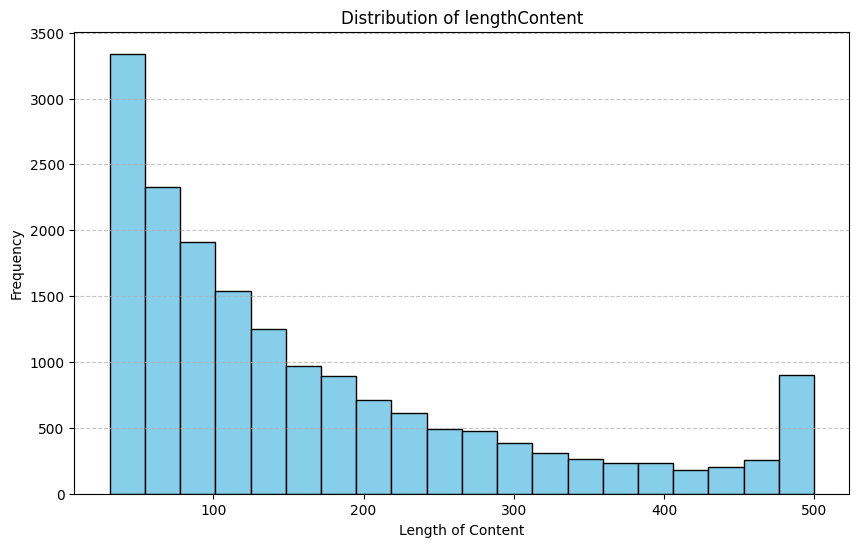

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(dataset['lengthContent'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Length of Content')
plt.ylabel('Frequency')
plt.title('Distribution of lengthContent')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#!pip install langdetect

In [ ]:
from langdetect import detect

# Function to perform language identification with langdetect
def identify_language(review_description):
    try:
        language_code = detect(review_description)
        return language_code
    except:
        return "unknown"

In [ ]:
# Identify the language for each review description
dataset["Language"] = dataset["content"].apply(identify_language)

# Print the DataFrame with the identified languages
print(dataset[["content", "Language"]])

                                                 content Language
0      Can't sign in. Will never call to access accou...       en
1      With every update something new is broken and ...       en
2             laggy can't do anything. bad search engine       en
3               It's much easier to use on mobile phones       en
4                    Just give numbered code for lockers       en
...                                                  ...      ...
17491  Having a problem with email weblinks not openi...       en
17492  Not up to par. App constantly freezes and cras...       en
17493  Shopping with Amazon is fine. I enjoy it and t...       en
17494  Basicly Good But...since a couple updates ago,...       en
17495  I would like refund on my subscription payment...       en

[17496 rows x 2 columns]


In [ ]:
filtered_df = dataset[dataset['Language'] == 'en'].reset_index()

In [ ]:
filtered_df

,level_0,index,Unnamed: 0,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sentiment,lengthContent,Language
0,0,0,0,7bf6a011-e66c-4842-b18b-18c726e9f5ee,Can't sign in. Will never call to access accou...,1,0,26.23.4.100,2024-01-09 01:08:56,NaN,NaN,26.23.4.100,0,65,en
1,1,1,1,49237f5d-7684-42e8-8a89-6ed766a10026,With every update something new is broken and ...,1,0,26.23.4.100,2024-01-09 01:07:44,NaN,NaN,26.23.4.100,0,406,en
2,2,2,2,29fb521d-f9f0-49f1-81f7-c4aafd9b8bf7,laggy can't do anything. bad search engine,1,0,26.23.4.100,2024-01-09 00:51:25,NaN,NaN,26.23.4.100,0,42,en
3,3,3,3,c9d0b449-d963-4f1a-bcf0-1dcf29148cc1,It's much easier to use on mobile phones,3,0,26.23.4.100,2024-01-09 00:20:27,NaN,NaN,26.23.4.100,1,40,en
4,4,6,6,4b580717-2d07-4fa0-bdf9-195e11497673,Just give numbered code for lockers,1,1,26.23.4.100,2024-01-08 23:33:33,NaN,NaN,26.23.4.100,0,35,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16909,17491,24993,24993,de1c4ae1-7b34-4a73-af67-105f2f3b087b,Having a problem with email weblinks not openi...,3,0,24.8.0.100,2022-05-05 18:27:30,NaN,NaN,24.8.0.100,1,187,en
16910,17492,24994,24994,6e8fe088-2777-412a-81ff-9019751a4f19,Not up to par. App constantly freezes and cras...,4,52,24.8.0.100,2022-05-05 18:23:13,NaN,NaN,24.8.0.100,2,481,en
16911,17493,24996,24996,c0c38562-f271-42e9-9746-743813e63296,Shopping with Amazon is fine. I enjoy it and t...,3,614,24.8.0.100,2022-05-05 11:12:48,NaN,NaN,24.8.0.100,1,468,en
16912,17494,24997,24997,474b6f4e-c2d5-4587-ab46-6e48f5495024,"Basicly Good But...since a couple updates ago,...",3,84,24.8.0.100,2022-05-05 07:44:01,NaN,NaN,24.8.0.100,1,294,en


In [ ]:
# Let's check for missing values
filtered_df.isnull().sum()

level_0                     0
index                       0
Unnamed: 0                  0
reviewId                    0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion     1780
at                          0
replyContent            16913
repliedAt               16913
appVersion               1780
sentiment                   0
lengthContent               0
Language                    0
dtype: int64

In [ ]:
# Count the occurrences of each score
score_counts_FD = filtered_df['score'].value_counts().sort_index()
print(score_counts_FD)

1    3722
2    4304
3    3880
4    2851
5    2157
Name: score, dtype: int64


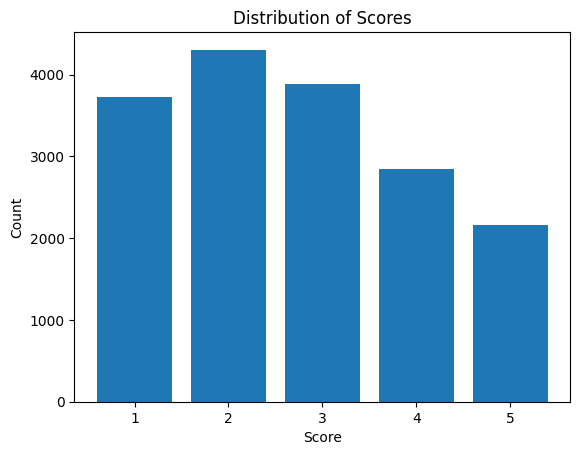

In [ ]:
# Create a bar plot
plt.bar(score_counts_FD.index, score_counts_FD.values)

# Set plot labels and title
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')

# Set the x-axis ticks to show only integers from 1 to 5
plt.xticks(range(1, 6))

# Show the plot
plt.show()

In [ ]:
grades_counts_FD = filtered_df['sentiment'].value_counts().sort_index()
print(grades_counts_FD)

0    8026
1    3880
2    5008
Name: sentiment, dtype: int64


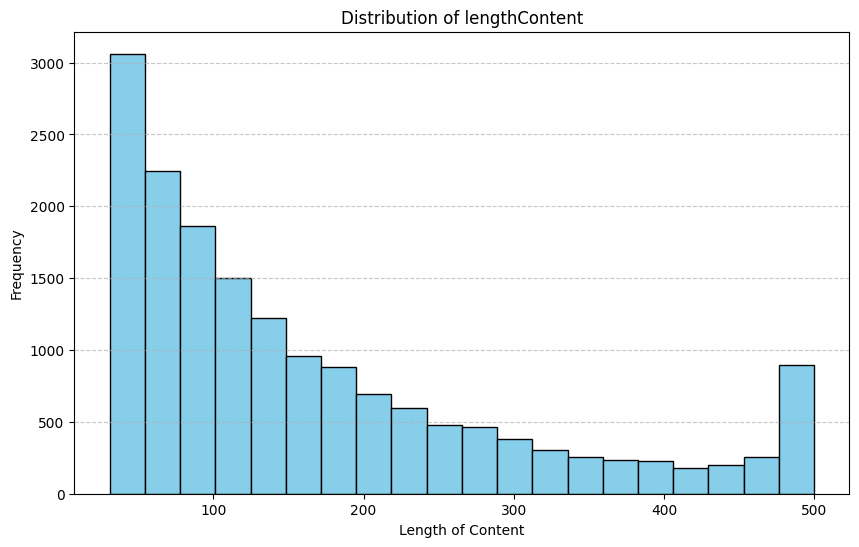

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['lengthContent'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Length of Content')
plt.ylabel('Frequency')
plt.title('Distribution of lengthContent')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

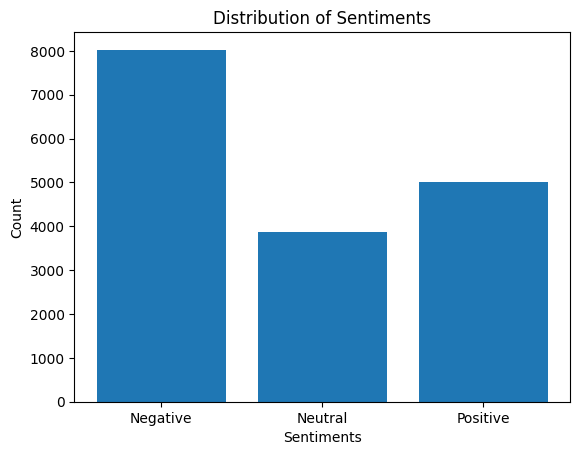

In [ ]:
# Create a bar plot
plt.bar(grades_counts_FD.index, grades_counts_FD.values)

class_names = ['Negative', 'Neutral', 'Positive']
# Set plot labels and title
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Set the x-axis ticks to show only integers from 1 to 5
plt.xticks(grades_counts_FD.index, class_names)

# Show the plot
plt.show()

In [ ]:
negative_class = filtered_df[filtered_df['sentiment'] == 0]
neutral_class = filtered_df[filtered_df['sentiment'] == 1]
positive_class = filtered_df[filtered_df['sentiment'] == 2]

In [ ]:
num_samples_negative = len(negative_class)
desired_num_samples = min(len(neutral_class), len(positive_class))

In [ ]:
undersampled_negative_class = resample(negative_class, replace=False, n_samples=desired_num_samples, random_state=42)

In [ ]:
undersampled_positive_class = resample(positive_class, replace=False, n_samples=desired_num_samples, random_state=42)

In [ ]:
balanced_dataset = pd.concat([undersampled_negative_class, neutral_class, undersampled_positive_class])

In [ ]:
sentiment_counts_balanced = balanced_dataset['sentiment'].value_counts().sort_index()
print(sentiment_counts_balanced)

0    3880
1    3880
2    3880
Name: sentiment, dtype: int64


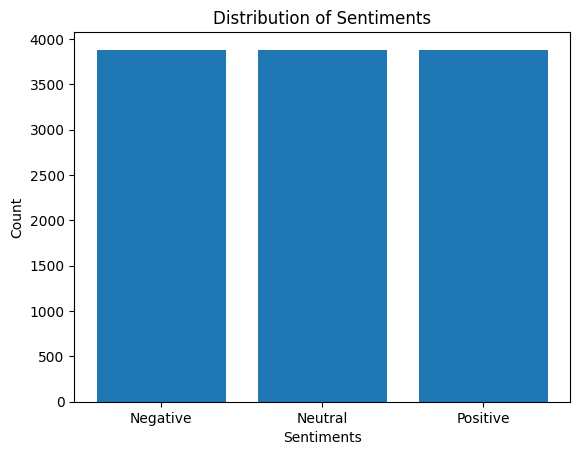

In [ ]:
# Create a bar plot
plt.bar(sentiment_counts_balanced.index, sentiment_counts_balanced.values)

class_names = ['Negative', 'Neutral', 'Positive']
# Set plot labels and title
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Set the x-axis ticks to show only integers from 1 to 5
plt.xticks(sentiment_counts_balanced.index, class_names)

# Show the plot
plt.show()

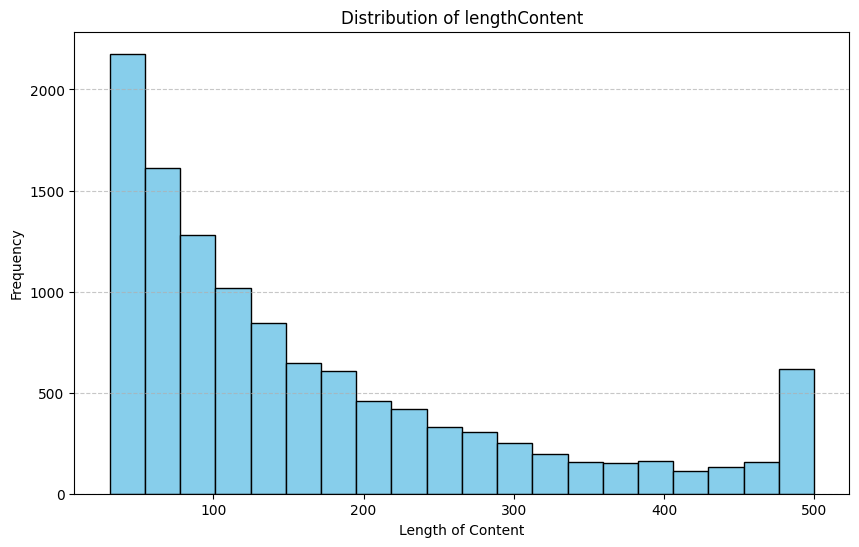

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(balanced_dataset['lengthContent'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Length of Content')
plt.ylabel('Frequency')
plt.title('Distribution of lengthContent')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Create train and validation datasets
comments = dataset[['content', 'sentiment']]

Random Undersampling: This involves randomly removing samples from overrepresented classes until you achieve a balanced dataset. This can lead to a loss of information and should be used with caution.

In [ ]:
negative_class_b = balanced_dataset[balanced_dataset['sentiment'] == 0]
neutral_class_b = balanced_dataset[balanced_dataset['sentiment'] == 1]
positive_class_b = balanced_dataset[balanced_dataset['sentiment'] == 2]

In [ ]:
train_data_neg, val_data_neg = train_test_split(negative_class_b, test_size=0.2, random_state=42)
train_data_neu, val_data_neu = train_test_split(neutral_class_b, test_size=0.2, random_state=42)
train_data_pos, val_data_pos = train_test_split(positive_class_b, test_size=0.2, random_state=42)

3880


In [ ]:
train_data = pd.concat([train_data_neg, train_data_neu, train_data_pos])
val_data = pd.concat([val_data_neg, val_data_neu, val_data_pos])
train_data_s = train_data.sample(frac=1).reset_index(drop=True)
val_data_s = val_data.sample(frac=1).reset_index(drop=True)

In [ ]:
path = '/content/drive/MyDrive/H.IAAC/datasets/'
output_file_path = 'filtered_output.csv'
destination = path+output_file_path

# Use the to_csv method to export the DataFrame to a CSV file
filtered_df.to_csv(destination, index=False)  # Set index=False to exclude the index column in the CSV file

In [ ]:
df = filtered_df.sample(frac=1).reset_index(drop=True)

In [ ]:
df_first_part = df.iloc[:10000]   # First 10,000 rows
df_second_part = df.iloc[10000:]  # The rest of the rows

In [ ]:
path = '/content/drive/MyDrive/H.IAAC/datasets/'
output_file_path = 'filtered_output_fT.csv'
destination = path+output_file_path

# Use the to_csv method to export the DataFrame to a CSV file
df_first_part.to_csv(destination, index=False)  # Set index=False to exclude the index column in the CSV file

In [ ]:
path = '/content/drive/MyDrive/H.IAAC/datasets/'
output_file_path = 'filtered_output_rest.csv'
destination = path+output_file_path

# Use the to_csv method to export the DataFrame to a CSV file
df_second_part.to_csv(destination, index=False)  # Set index=False to exclude the index column in the CSV file

In [ ]:
path = '/content/drive/MyDrive/H.IAAC/datasets/'
output_file_path = 'balanced_output_train.csv'
destination = path+output_file_path

# Use the to_csv method to export the DataFrame to a CSV file
train_data_s.to_csv(destination, index=False)  # Set index=False to exclude the index column in the CSV file

In [ ]:
path = '/content/drive/MyDrive/H.IAAC/datasets/'
output_file_path = 'balanced_output_val.csv'
destination = path+output_file_path

# Use the to_csv method to export the DataFrame to a CSV file
val_data_s.to_csv(destination, index=False)  # Set index=False to exclude the index column in the CSV file